In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Missing values per column:
 id                      0
name                    0
nationality             0
city                    0
latitude                0
longitude               0
gender                  0
ethnic.group          307
age                     0
english.grade           0
math.grade              0
sciences.grade          0
language.grade          0
portfolio.rating        0
coverletter.rating      0
refletter.rating        0
dtype: int64

Statistical summary:
                 id       name               nationality         city  \
count   307.000000        307                       307          307   
unique         NaN        307                        31          161   
top            NaN  Kiana Lor  United States of America  Los Angeles   
freq           NaN          1                       193           46   
mean    153.000000        NaN                       NaN          NaN   
std      88.767487        NaN                       NaN          NaN   
min       0.0000

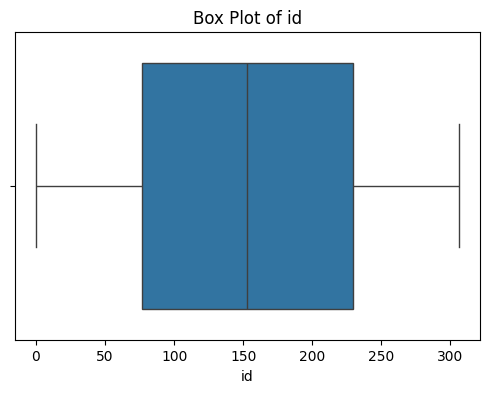

,id,name,nationality,city,latitude,longitude,gender,ethnic.group,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating,id_minmax
0,0,Kiana Lor,China,Suzhou,31.31,120.62,F,NaN,22,3.5,3.7,3.1,1.0,4,4.0,4,0.000000
1,1,Joshua Lonaker,United States of America,Santa Clarita,34.39,-118.54,M,NaN,22,2.9,3.2,3.6,5.0,5,4.0,5,0.003268
2,2,Dakota Blanco,United States of America,Oakland,37.80,-122.27,F,NaN,22,3.9,3.8,3.2,5.0,3,3.0,4,0.006536
3,3,Natasha Yarusso,United States of America,Castro Valley,37.69,-122.09,F,NaN,20,3.3,2.8,3.2,5.0,5,2.0,4,0.009804
4,4,Brooke Cazares,Brazil,São José dos Campos,-23.18,-45.88,F,NaN,21,3.7,2.6,3.4,1.0,4,4.0,5,0.013072


In [11]:
# Load the student dataset
stu = pd.read_csv(r"C:\Users\Aniket\Downloads\student-dataset.csv")  # DataFrame from CSV :contentReference[oaicite:4]{index=4}

# 2. Missing values & statistics
print("Missing values per column:\n", stu.isnull().sum())            # count NaNs :contentReference[oaicite:5]{index=5}
print("\nStatistical summary:\n", stu.describe(include='all'))       # summary stats & modes :contentReference[oaicite:6]{index=6}

# 3. Variable descriptions & dimensions
def var_summary(df):
    """
    Returns a DataFrame summarizing:
      - dtype of each column
      - number of unique values (nunique)
      - count of non-null entries (count)
    """
    return pd.DataFrame({
        'dtype': df.dtypes,               # column data types :contentReference[oaicite:7]{index=7}
        'unique': df.nunique(),           # distinct value counts :contentReference[oaicite:8]{index=8}
        'non_null': df.count()            # non-null counts 
    })

print("\nVariable summary:\n", var_summary(stu))                      # show dtype, unique, non-null
print("\nDataFrame shape:", stu.shape)                               # (rows, columns) 

# 4. Min–Max normalization & box plot
#    Normalize all numeric columns and plot the first one
num_cols = stu.select_dtypes(include=[np.number]).columns.tolist()
if num_cols:
    col0 = num_cols[0]
    stu[col0 + '_minmax'] = (stu[col0] - stu[col0].min()) / (stu[col0].max() - stu[col0].min())
    plt.figure(figsize=(6,4))
    sns.boxplot(x=stu[col0])                                       # visualize distribution 
    plt.title(f'Box Plot of {col0}')
    plt.show()

# 5. Encode 'PG' categorical column into numeric codes
if 'PG' in stu.columns:
    stu['PG_code'] = stu['PG'].astype('category').cat.codes     # category → codes 

# Display first few rows of the processed DataFrame
stu.head()
